### why wasserstein
- https://jamesmccaffrey.wordpress.com/2021/08/23/comparing-wasserstein-distance-with-kullback-leibler-distance/

*We haver common support of all points, so in theory KL and JS can be used.

### this impl.
- https://github.com/pkomiske/Wasserstein/
- https://github.com/pkomiske/Wasserstein/blob/master/demos/Wasserstein%20Demo.ipynb
- https://pypi.org/project/Wasserstein/
- https://pkomiske.github.io/Wasserstein/


### Potentiall More scalable version:
- https://github.com/lrcfmd/ElM2D
- https://github.com/sparks-baird/chem_wasserstein
- https://pypi.org/project/chem_wasserstein/
- https://github.com/KrishnaswamyLab/DiffusionEMD

### pytorch appprox:
- https://dfdazac.github.io/sinkhorn.html (THIS!)
- https://github.com/dfdazac/wassdistance
- https://github.com/gpeyre/SinkhornAutoDiff
- https://www.kernel-operations.io/geomloss/index.html
- https://www.kernel-operations.io/geomloss/api/pytorch-api.html (potentially interesting loss!!!)
- https://github.com/dfdazac/wassdistance/blob/master/layers.py (mini batch implimentation)

more pytorch sinkhorn:
- https://gist.github.com/wohlert/8589045ab544082560cc5f8915cc90bd
- https://gist.github.com/noskill/c32f2e6148e14f2f9a2945b03bab42ac

In [9]:
import numpy as np
import wasserstein
import matplotlib.pyplot as plt

In [2]:

# create an EMD object with the default parameters
emd = wasserstein.EMD(n_iter_max = 200000)
print(emd)

EMD
  ArrayEvent<8-byte float, variable particle dimension>
    norm - false
    external_dists - false

  EuclideanArrayDistance
    R - 1
    beta - 1

  NetworkSimplex
    n_iter_max - 200000
    epsilon_large - 2.22045e-13
    epsilon_small - 2.22045e-16



In [11]:

# get some points in a euclidean space
M = 25 # go higer and lap top can't allocate enough ram. No issue on computerome
coords0, coords1 = np.random.rand(2, M, 2) # would be spatial coordinates of dist0 and dist1
weights0, weights1 = np.random.rand(2, M) # would be the true/estimated values for each point.

# run EMD computation
emd_val = emd(weights0, coords0, weights1, coords1)
print('EMD value:', emd_val)

EMD value: 3.466944603527411


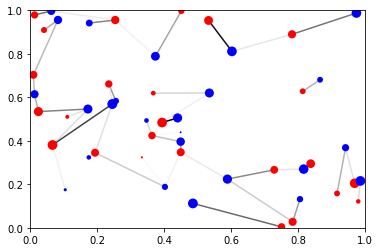

In [12]:
flows = emd.flows()



# plot the events
zf = 100
plt.scatter(coords0[:,0], coords0[:,1], s=zf*weights0, lw=0, color='red')
plt.scatter(coords1[:,0], coords1[:,1], s=zf*weights1, lw=0, color='blue')

# plot flows
cmap = plt.get_cmap('Greys')
fmax = flows.max()
for i in range(len(weights0)):
    for j in range(len(weights1)):
        f = flows[i,j]
        if f > 0.:
            plt.plot([coords0[i,0], coords1[j,0]], [coords0[i,1], coords1[j,1]],
                     lw=1.5, color=cmap(f/fmax), zorder=0)

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.show()
